### Probability in Python

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amir = pd.read_csv('amir_deals.csv', index_col=0)

amir.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [16]:
# Access the 'product' column and use .value_counts()
counts = amir['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


### Law of Large numbers

As the size of your sample increases, the sample mean will apporach the expected value

In [17]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform


# Calculate probability of waiting less than 5 mins

prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(f'Prob to wait less than 5 mins: {prob_less_than_5}')

# calculate probability of waiting for more than 10 mins and less than 20 mins
prob_more_than_10 = uniform.cdf(10, min_time, max_time)
prob_more_than_20 = uniform.cdf(20, min_time, max_time)
prob_more_than_10_less_than_20 = prob_more_than_20 - prob_more_than_10
print(f'Prob to wait more than 10, but less than 20 mins: {prob_more_than_10_less_than_20}')

Prob to wait less than 5 mins: 0.16666666666666666
Prob to wait more than 10, but less than 20 mins: 0.3333333333333333


## Binomial distribution

In [18]:
from scipy.stats import binom

# binom.rvs(number of trials, probability of success, size)

# binom.pmf(variable_evaluated, number of trials, probability of success)
np.random.seed(10)

binom.pmf(3, 5, 0.1)

# binom.cdf(variable_evaluated, number of trials, probability of success)

0.0081

## Normal Distribution

In [19]:
from scipy.stats import norm
# Generating 50 random heights of womens

# norm.ppf(probability, average, standard deviation)
# norm.cdf(variable_evaluated, average, standard deviation)

# norm.rvs(average, standard deviation, size)
# norm.pdf(variable_evaluated, average, standard deviation)

# nomr.sf(variable_evaluated, average, standard deviation)
# norm.isf(probability, average, standard deviation)

# norm.res(average, standard deviation, size)
norm.rvs(161, 7, size = 50)

array([170.32110553, 166.00695282, 150.18219796, 160.94131305,
       165.34935182, 155.95940107, 162.8585811 , 161.75983968,
       161.03004002, 159.77779853, 164.03118333, 169.42126162,
       154.24454031, 168.19791855, 162.60041091, 164.11596329,
       153.04378452, 161.94595815, 171.39175901, 153.4413658 ,
       147.15590204, 148.79639393, 162.86249115, 177.69477131,
       168.86583877, 172.70835549, 161.69404451, 170.78597464,
       159.10126408, 165.29242929, 159.12877968, 157.1548369 ,
       161.92895807, 157.6670059 , 170.15931157, 162.36509295,
       163.80146992, 158.63657364, 169.79530585, 155.87621349,
       165.62162086, 158.54389676, 154.42396648, 157.57463948,
       155.367862  , 159.51111653, 158.62601828, 163.18518955,
       164.95606869, 159.9680582 ])

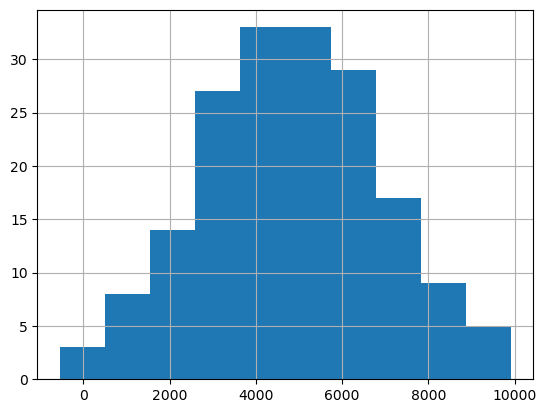

In [22]:
# exampels
amir['amount'].hist(bins = 10)
plt.show()

### Poisson distribution

- Events appear to happen at a certain rate, but completely at random
- Examples
  - Number of animals adopted from an animal shelter per week
  - Number of people arriving at a restaurant perhour

### Lambda
Lamda is the average number of events per time interval

In [3]:
from scipy.stats import poisson
#* Example of dogs, average dogs adopted per week = 8
# poisson.pmf(variable_evaluated, average(lambda))

# Probability of adopting 5 dogs
poisson.pmf(5, 8)

0.09160366159257921

In [9]:
# Probability of adopting less than 5 dogs
poisson.cdf(5, 8)

0.19123606207962532

In [11]:
# Probability of adopting more 5 dogs
1 - poisson.cdf(5, 8)

0.8087639379203747

In [12]:
# Sampling from a poisson distribution
# poisson.rvs(average, size)
poisson.rvs(8, size = 10)

array([ 6,  9, 10,  6,  7,  7,  6,  3,  9,  6], dtype=int64)

## Other distributons

> #### Exponential Distribution => This distribution also uses Lamda and is continuos
> Probability of time between Poisson Events
> - Examples  
> Probability of > 1 day between adoptions  
> Probability of < 10 minutes between restuarant arrivals  
> Probability of 6-8 monthos between earthquakes




In [15]:
from scipy.stats import expon

# Probability of waiting less than 1 mins
# expon.cdf(variable_evaluated, scale)
expon.cdf(1, scale = 2)


0.3934693402873666

In [17]:
# Probability of waiting more than 1 mins
1 - expon.cdf(4, scale = 2)

0.1353352832366127

In [18]:
# Probability of waiting between 1 and 4 mins
expon.cdf(4, scale = 2)- expon.cdf(1, scale = 2)

0.4711953764760207

### T-Distribution (Student's t distributions)

***This distributions has  a new parameter, **degrees of freedom** which affects
the thickness of the tails  
- Lower df = thicker tails, higher standar deviations
- Higher df = closer to normal distribution

This distribution is useful for t-test, and confidence intervals

### Log-normal distribution
Variable whose logarith is normally distributed
- Examples of this distributions are: 
  - Lenght of chess game
  - Adult blood pressure
  - Number of hospitalizacion in the 2020 COVID outbreak